In [1]:
import cv2
import os
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
from tqdm import tqdm

In [2]:
img_folder = "calibration5"
img_paths = [os.path.join(img_folder, f) for f in os.listdir(img_folder)]
print(img_paths[0:2])

['calibration5\\GOPR01170000.jpg', 'calibration5\\GOPR01170001.jpg']


In [3]:
imgs = [cv2.imread(path) for path in img_paths]

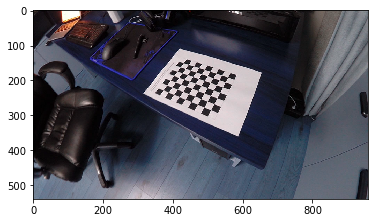

In [4]:
img = imgs[50]
plt.imshow(img)
plt.show()

In [5]:
result, corners = cv2.findChessboardCornersSB(img, (7, 9))

In [6]:
corn_img = cv2.drawChessboardCorners(img, (7, 9), corners, result)

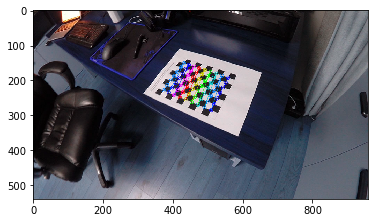

In [7]:
plt.imshow(corn_img)
plt.show()

In [8]:
objp = np.zeros((7*9,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:9].T.reshape(-1,2)

In [9]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera([objp], [corners], img.shape[0:2], None, None)

In [10]:
print(f"ret: {ret}\n mtx: {mtx}\n dist: {dist}\n rvecs: {rvecs}\n tvecs: {tvecs}")

ret: 0.18126252909243917
 mtx: [[6.05963994e+02 0.00000000e+00 2.82473534e+02]
 [0.00000000e+00 1.47933395e+03 5.21786521e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
 dist: [[-0.43280482  0.81089036 -0.03551838  0.04620535 -1.57444894]]
 rvecs: [array([[-0.38236801],
       [ 1.22157754],
       [ 2.00555231]])]
 tvecs: [array([[14.88643118],
       [-7.14773353],
       [32.6291887 ]])]


In [11]:
points2d = []
points3d = []
for img in tqdm(imgs[0:1368]):
    result, corners = cv2.findChessboardCorners(img, (7, 9))
    if result is True:
        points2d.append(corners)
        points3d.append(objp)

100%|███████████████████████████████████████████| 1368/1368 [01:05<00:00, 20.81it/s]


In [12]:
len(points2d)

1138

In [15]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(points3d[0:40], points2d[0:40], img.shape[0:2], None, None)

In [16]:
print(f"Camera matrix:\n {mtx}\n\n Distorsion:\n {dist}\n\n")

Camera matrix:
 [[5.98794588e+02 0.00000000e+00 2.79225195e+02]
 [0.00000000e+00 1.31543074e+03 5.13187102e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]

 Distorsion:
 [[-0.59518659  1.3888873  -0.02972393  0.03826537 -2.17059778]]


